<a href="https://colab.research.google.com/github/ozi10/ML-projects/blob/main/TF_MPG_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict MPG using Tensor Flow**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
raw_dataset['Origin'].unique()

array([1, 3, 2])

In [ ]:
dataset = raw_dataset.copy()

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.shape

(392, 8)

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Japan',3:'UK'})

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,UK,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')

KeyError: ignored

In [ ]:
dataset.shape

(392, 10)

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset =dataset.drop(train_dataset.index)

In [ ]:
train_dataset.shape

(314, 10)

In [ ]:
train_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,UK,USA
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0
182,28.0,4,107.0,86.0,2464.0,15.5,76,1,0,0


In [ ]:
test_dataset.shape

(78, 10)

In [ ]:
test_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,UK,USA
369,34.0,4,112.0,88.0,2395.0,18.0,82,0,0,1
375,36.0,4,105.0,74.0,1980.0,15.3,82,1,0,0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0,1,0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


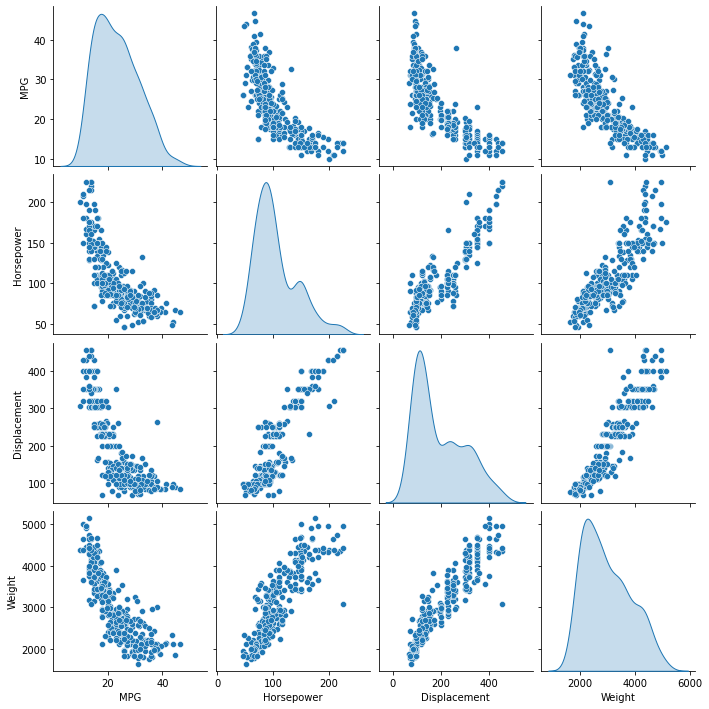

In [ ]:
sns.pairplot(train_dataset[['MPG','Horsepower','Displacement','Weight']],diag_kind='kde')

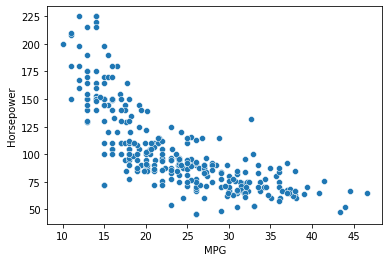

In [ ]:
sns.scatterplot(x=train_dataset['MPG'],y=train_dataset['Horsepower'])

In [ ]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,UK,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels=train_dataset.pop('MPG')
test_label=test_dataset.pop('MPG')

In [ ]:
train_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: MPG, dtype: float64

In [ ]:
train_features.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,UK,USA
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0
182,28.0,4,107.0,86.0,2464.0,15.5,76,1,0,0


**Training Model Without Normalization**

In [ ]:
horsepower = np.array(train_features['Horsepower'])
display(horsepower)

array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.,  60.,
       180.,  88., 150., 155.,  75., 115., 150.,  90.,  90., 129., 110.,
        90., 110.,  76., 165.,  92.,  88., 100., 150., 122.,  74.,  76.,
        67., 110.,  90.,  65., 150., 150., 220., 165.,  67.,  75., 140.,
        78., 149.,  84., 150., 145., 100.,  75., 170., 200.,  72.,  78.,
        76.,  88., 105.,  53.,  86.,  95.,  75.,  71., 198.,  69., 105.,
       215.,  88.,  87.,  65.,  60.,  68., 129., 145.,  95., 153.,  70.,
       145.,  68.,  70., 100.,  70.,  81.,  95., 225.,  90.,  97., 100.,
        65., 110.,  89., 150., 110.,  95.,  85.,  97.,  60.,  88.,  52.,
        70., 198.,  71.,  90.,  72.,  63., 115.,  90., 135.,  52., 150.,
       170.,  58.,  96., 125.,  92.,  95.,  90.,  95.,  82., 110.,  78.,
        67., 208., 105., 130., 150.,  46.,  90.,  64.,  75.,  85.,  72.,
        95.,  90., 145.,  88., 167., 120., 190.,  78.,  49.,  86., 150.,
        70., 107.,  80., 150., 105., 100., 145.,  8

In [ ]:
horsepower_model = tf.keras.Sequential([
                                        layers.Dense(1,input_shape=[1])
])

In [ ]:
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10])

array([[ 92.714],
       [108.785],
       [197.791],
       [ 77.88 ],
       [ 82.825],
       [111.257],
       [ 74.172],
       [ 82.825],
       [117.438],
       [108.785]], dtype=float32)

In [ ]:
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),loss=['mae'],metrics=['accuracy'])

In [ ]:
history = horsepower_model.fit(train_features['Horsepower'],train_labels,validation_split=0.2,epochs=100,verbose=0)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,4.562191,0.0,3.970799,0.0,95
96,4.026912,0.0,4.020093,0.0,96
97,4.227730,0.0,4.351501,0.0,97
98,4.445347,0.0,4.026153,0.0,98
99,4.360711,0.0,3.952008,0.0,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MPG')
  plt.ylim([0,10])
  plt.show

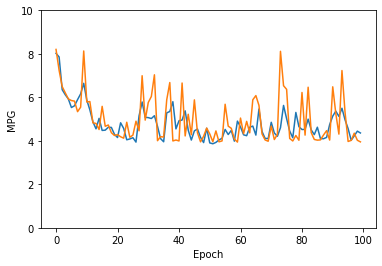

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model']=horsepower_model.evaluate(test_features['Horsepower'],test_label,verbose=0)

In [ ]:
test_results

{'horsepower_model': [3.5439891815185547, 0.0]}

In [ ]:
x=tf.linspace(0,150,250)
y=horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x,y):
  plt.scatter(test_features['Horsepower'],test_label,label='data')
  plt.plot(x,y,color='k')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.show()

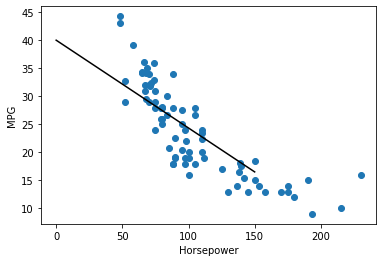

In [ ]:
plot_horsepower(x,y)

With **Normalization**

In [ ]:
normalize = preprocessing.Normalization(axis=-1)

In [ ]:
normalize.adapt(np.array(train_features))

In [ ]:
print(normalize.mean.numpy())

[[  23.311    5.478  195.318  104.869 2990.252   15.559   75.898    0.178
     0.197    0.624]]


In [ ]:
horsepower = np.array(train_features['Horsepower'])

In [ ]:
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
                                        horsepower_normalizer,
                                        layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10])

array([[-0.771],
       [-0.435],
       [ 1.422],
       [-1.08 ],
       [-0.977],
       [-0.384],
       [-1.158],
       [-0.977],
       [-0.255],
       [-0.435]], dtype=float32)

In [ ]:
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),loss=['mae'])

In [ ]:
history = horsepower_model.fit(train_features['Horsepower'],train_labels,epochs=200,verbose=0,validation_split=0.2)

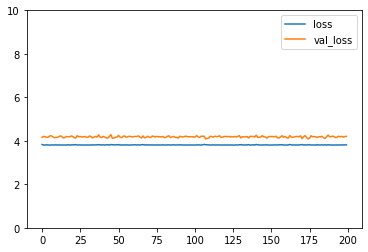

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot();
plt.ylim([0,10])
plt.show()

In [ ]:
test_result = horsepower_model.evaluate(test_features['Horsepower'],test_label,verbose=0)
test_result

3.6455719470977783

In [ ]:
x=tf.linspace(0,250,251)
y=horsepower_model.predict(x)

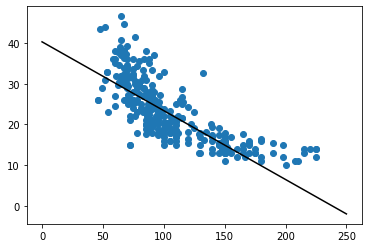

In [ ]:
plt.scatter(train_features['Horsepower'],train_labels,label='data')
plt.plot(x,y,color='k',label='predictions')

**Multiple variable predictions**

In [ ]:
linear_model = tf.keras.Sequential([
                                    normalize,
                                    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 10)                21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 32
Trainable params: 11
Non-trainable params: 21
_________________________________________________________________


In [ ]:
linear_model.predict(train_features[:10])

array([[ 0.838],
       [ 0.438],
       [-1.091],
       [-0.274],
       [ 0.627],
       [ 0.124],
       [ 0.465],
       [-0.357],
       [ 0.244],
       [ 1.838]], dtype=float32)

In [ ]:
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),loss=['mae'])

In [ ]:
history = linear_model.fit(train_features,train_labels,validation_split=0.2,verbose=0,epochs=100)

(0.0, 10.0)

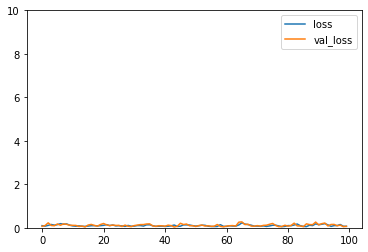

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot()
plt.ylim([0,10])

In [ ]:
history_df.tail()

,loss,val_loss
95,0.101545,0.155841
96,0.102772,0.094543
97,0.150511,0.123474
98,0.071160,0.052058
99,0.066913,0.068653


In [ ]:
test_results['Linear_regression'] = linear_model.evaluate(test_features,test_label,verbose=0)
test_results

{'Linear_regression': 0.05838446691632271,
 'horsepower_model': [3.5439891815185547, 0.0]}

**DNN model**

In [ ]:
DNN_model = tf.keras.Sequential([
                                 normalize,
                                 layers.Dense(64, activation='relu'),
                                 #layers.Dropout(0.3),
                                 #layers.BatchNormalization(),
                                 layers.Dense(128,activation='relu'),
                                 #layers.Dropout(0.3),
                                 #layers.BatchNormalization(),
                                 layers.Dense(1)
])

DNN_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 10)                21        
_________________________________________________________________
dense_24 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 9,174
Trainable params: 9,153
Non-trainable params: 21
_________________________________________________________________


In [ ]:
DNN_model.predict(train_features[:10])

array([[-0.22 ],
       [ 0.104],
       [ 0.388],
       [ 0.095],
       [ 0.038],
       [ 0.13 ],
       [ 0.054],
       [ 0.697],
       [ 0.064],
       [-0.277]], dtype=float32)

In [ ]:
DNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss=['mae'])

In [ ]:
history = DNN_model.fit(train_features,train_labels,validation_split=0.2,epochs=200,verbose=0)

(0.0, 10.0)

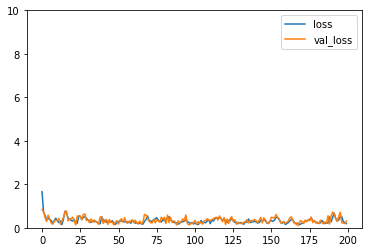

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot()
plt.ylim([0,10])

In [ ]:
history_df.tail()

,loss,val_loss
195,0.500058,0.716678
196,0.505969,0.226255
197,0.282960,0.219016
198,0.238289,0.193672
199,0.190408,0.310480


In [ ]:
test_results['DNN']  = DNN_model.evaluate(test_features,test_label,verbose=0)
test_results

{'DNN': 0.32285112142562866,
 'Linear_regression': 0.05838446691632271,
 'horsepower_model': [3.5439891815185547, 0.0]}

In [ ]:
x=tf.linspace(0,250,251)
y=DNN_model.predict(x)

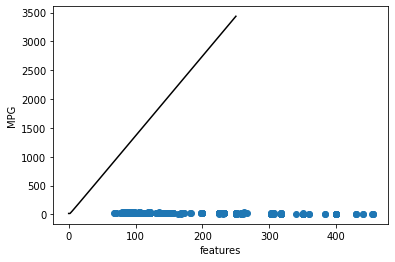

In [ ]:
plt.scatter(train_features['Displacement'],train_labels,label='data')
plt.plot(x,y,color='k',label='predicrion')
plt.xlabel('features')
plt.ylabel('MPG')
plt.show()

In [ ]:
test_prediction_DNN = DNN_model.predict(test_features).flatten()
test_prediction_linear =linear_model.predict(test_features).flatten()

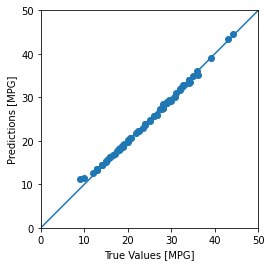

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_label, test_prediction_DNN)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

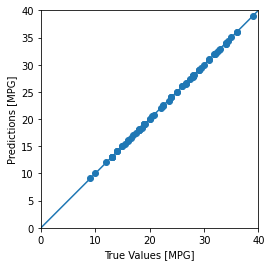

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_label, test_prediction_linear)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims=[0,40]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)

In [ ]:
pred_df=pd.DataFrame()

In [ ]:
pred_df['actual'] = test_label
pred_df['DNN_pred'] = test_prediction_DNN
pred_df['liner_pre'] = test_prediction_linear

In [ ]:
pred_df.head()

,actual,DNN_pred,liner_pre
9,15.0,15.212655,15.024620
25,10.0,11.337379,10.077783
28,9.0,11.328385,9.125801
31,25.0,24.621395,25.064930
33,19.0,18.769669,19.057644
